In [16]:
from MRF import *
import numpy as np
import seaborn as sns

In [17]:
url='https://drive.google.com/file/d/1CB3ljKymznbExcMb9ckO4c2qaBuQxxHB/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, index_col = "Unnamed: 0").reset_index(drop = True)

In [18]:
df = pd.read_csv("/Users/ryanlucas/Desktop/mat.csv", index_col = "Unnamed: 0")

In [19]:
df

,PAYEMS,PAYEMS.l1,F_1.l1,F_2.l1,F_3.l1,F_4.l1,F_5.l1,MAF_1.l1,MAF_2.l1,MAF_3.l1,trend
1,0.000079,0.000781,-3.448621,-3.757808,2.135087,6.158099,-0.756587,-24.430689,23.652427,-11.180313,1
2,-0.000571,0.000079,-2.437831,1.538254,-1.779137,9.956491,-0.705905,-25.743333,23.104332,-11.575205,2
3,-0.000354,-0.000571,-5.140423,0.261719,-1.144619,7.897809,-0.525376,-27.532826,22.534573,-12.688364,3
4,-0.001737,-0.000354,-4.333899,3.133827,-1.938026,8.523099,-0.204046,-29.392758,21.758538,-13.359394,4
5,-0.001283,-0.001737,-4.135100,0.606762,-0.008077,-0.908704,-1.573666,-31.232862,21.071040,-14.412521,5
...,...,...,...,...,...,...,...,...,...,...,...
167,0.004362,0.004585,6.573487,0.558520,-1.655593,-0.277031,1.353771,-6.973169,16.567655,19.631437,167
168,0.003948,0.004362,4.310718,-4.036972,0.715692,0.356950,1.844560,-6.705149,16.630873,20.498099,168
169,0.003218,0.003948,2.242833,-5.167236,-1.266178,-0.248318,2.408852,-6.211410,16.875710,21.080249,169
170,0.004518,0.003218,5.047799,-0.255663,-1.987988,-2.788986,-1.383763,-6.120099,16.889412,21.336064,170


In [20]:
### Dependent Variable
my_var = "PAYEMS"
y_pos = df.columns.get_loc(my_var)

### Exogenous Variables
x_vars = ["PAYEMS.l1", 'F_1.l1', 'F_2.l1', 'F_3.l1', 'MAF_1.l1', 'MAF_2.l1', 'MAF_3.l1']
x_pos = [df.columns.get_loc(x) for x in x_vars]

### Forecast Horizon
hor = 1

In [21]:
np.random.seed(1234)

In [22]:
MRF = MacroRandomForest(data = df,
                        y_pos = y_pos,
                        x_pos = x_pos, 
                        B = 1000, 
                        ridge_lambda=0.15,
                        parallelise = True,
                        n_cores = -1,
                        oos_pos = np.arange(len(df)- 1, len(df)),
                        trend_push = 2,
                        quantile_rate = 0.3, 
                        fast_rw = True)

In [23]:
MRF_output = MRF._ensemble_loop()

In [24]:
pred = float(MRF_output['pred'].values)

In [25]:
pred

0.003602539558087706

In [26]:
y = float(149629 * np.cumprod(np.exp(pred)) - 149629)

In [27]:
y

540.0165229392005

In [28]:
d = [149629 * np.exp(float(value)) - 149629 for value in MRF_output['pred_ensemble']]

/Users/ryanlucas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.8 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


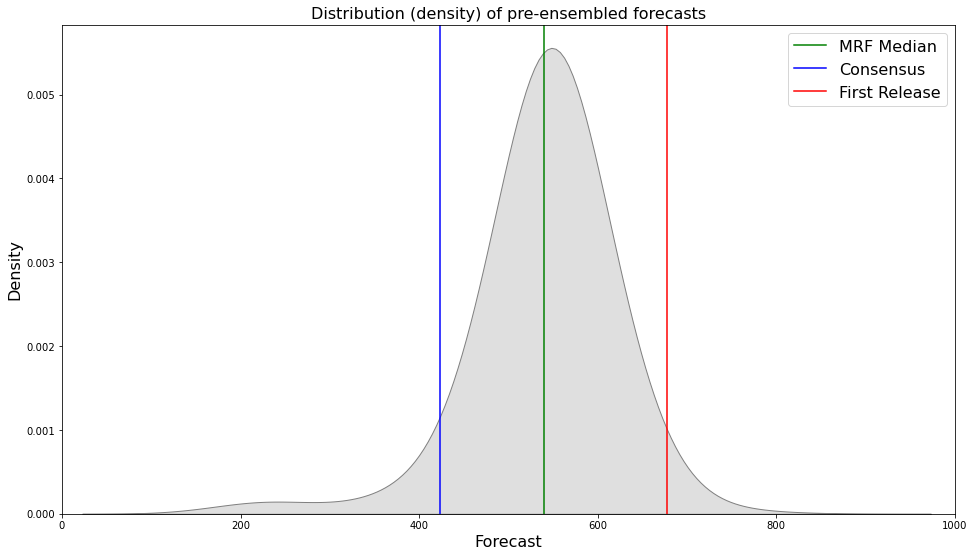

In [29]:
fig, ax = plt.subplots()
sns.kdeplot(d, ax = ax, color = 'grey', shade = True, bw = 0.8)

fig.set_size_inches([16, 9])
ax.set_xlabel("Forecast", fontsize = 16)
ax.set_ylabel("Density", fontsize = 16)
ax.set_xlim([0, 1000])
ax.axvline(y, color = 'green', label = "MRF Median")
ax.axvline(423, color = 'blue', label = "Consensus")
ax.axvline(678, color = 'red', label = "First Release")
ax.set_title("Distribution (density) of pre-ensembled forecasts", fontsize = 16)
ax.legend(fontsize = 16)

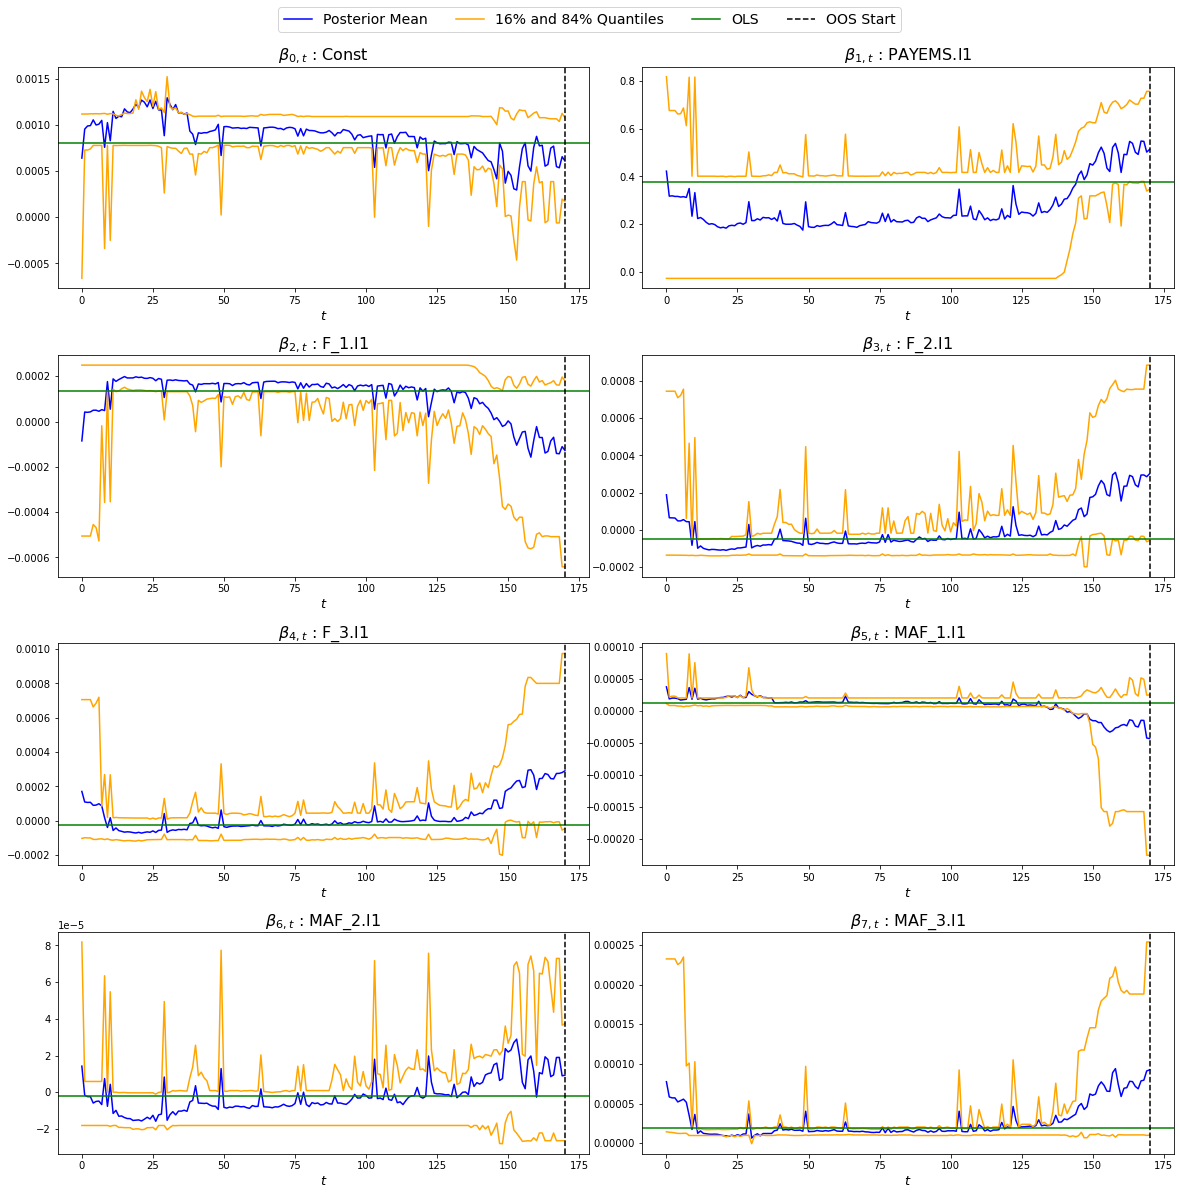

In [30]:
MRF.band_plots()